In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [193]:
adult = pd.read_csv('adult_data.csv', header= None, names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',\
                                                                         'marital-status', 'occupation', 'relationship', 'race', 'sex', \
                                                                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country' ,\
                                                                         'income'])

adult.columns = adult.columns.str.replace(' ', '')
adult.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [23]:
adult.shape

(32561, 15)

In [47]:
adult.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [50]:
adult.info()
adult.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [29]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
adult['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [40]:
adult['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [44]:
adult['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [187]:
adult['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [149]:
# adult = adult.replace('?', 'NaN', inplace = True)

In [164]:
# adult1 = adult[adult['age'] == ' ?'].index
# adult2 = adult.drop(adult1)

In [171]:
# adult2.head(20)

In [184]:
# pd.get_dummies(adult)

In [195]:
adult.drop(['fnlwgt','education', 'marital-status', 'relationship', 'native-country'], axis = 1, inplace = True)

In [196]:
def encode_features(df):
    features = ['income']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

adult = encode_features(adult)
adult.head(10)

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,13,Adm-clerical,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,13,Exec-managerial,White,Male,0,0,13,0
2,38,Private,9,Handlers-cleaners,White,Male,0,0,40,0
3,53,Private,7,Handlers-cleaners,Black,Male,0,0,40,0
4,28,Private,13,Prof-specialty,Black,Female,0,0,40,0
5,37,Private,14,Exec-managerial,White,Female,0,0,40,0
6,49,Private,5,Other-service,Black,Female,0,0,16,0
7,52,Self-emp-not-inc,9,Exec-managerial,White,Male,0,0,45,1
8,31,Private,14,Prof-specialty,White,Female,14084,0,50,1
9,42,Private,13,Exec-managerial,White,Male,5178,0,40,1


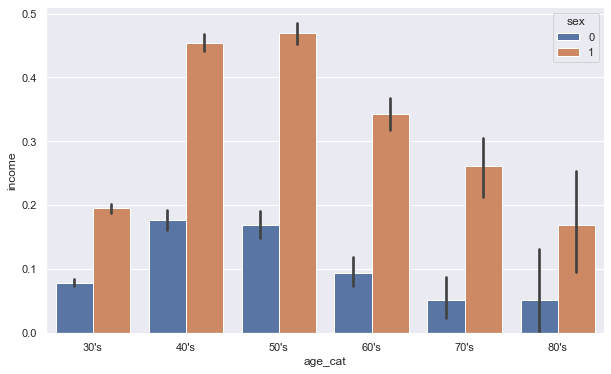

In [214]:
# 나이 및 성별에 따른 소득분포
def get_category(age):
    cat = ''
    if age < 40: cat = "30's"
    elif age < 50: cat = "40's"
    elif age < 60: cat = "50's"
    elif age < 70: cat = "60's"
    elif age < 80: cat = "70's"
    else: cat = "80's"
    
    return cat

plt.figure(figsize=(10,6))
group_names = ["30's", "40's", "50's", "60's", "70's", "80's"]

adult['age_cat'] = adult['age'].apply(lambda x : get_category(x))
sns.barplot(x = 'age_cat', y = 'income', hue = 'sex', data = adult, order = group_names)
adult.drop('age_cat', axis = 1, inplace = True)

In [239]:
for dataset in adult:
    dataset.loc[dataset['age'] < 40, 'age'] = 0,
    dataset.loc[(dataset['age'] >= 40) & (dataset['age'] < 50), 'age'] = 2,
    dataset.loc[(dataset['age'] >= 50) & (dataset['age'] < 60), 'age'] = 3,
    dataset.loc[(dataset['age'] >= 60) & (dataset['age'] < 70), 'age'] = 4,
    dataset.loc[(dataset['age'] >= 60) & (dataset['age'] < 80), 'age'] = 5,
    dataset.loc[dataset['age'] > 80, 'age'] = 6

AttributeError: 'str' object has no attribute 'loc'

In [200]:
def format_features(df):
    features = ['workclass','occupation', 'race', 'sex']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [202]:
adult = format_features(adult)
adult.head(10)

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,7,13,1,4,1,2174,0,40,0
1,50,6,13,4,4,1,0,0,13,0
2,38,4,9,6,4,1,0,0,40,0
3,53,4,7,6,2,1,0,0,40,0
4,28,4,13,10,2,0,0,0,40,0
5,37,4,14,4,4,0,0,0,40,0
6,49,4,5,8,2,0,0,0,16,0
7,52,6,9,4,4,1,0,0,45,1
8,31,4,14,10,4,0,14084,0,50,1
9,42,4,13,4,4,1,5178,0,40,1


In [245]:
adult_df = pd.read_csv('adult_data.csv')
y_adult_df = adult['income']
X_adult_df = adult.drop('income', axis = 1)

X_adult = format_features(X_adult)
print(X_adult)

       age  workclass  education-num  occupation  race  sex  capital-gain  \
0       39          7             13           1     4    1          2174   
1       50          6             13           4     4    1             0   
2       38          4              9           6     4    1             0   
3       53          4              7           6     2    1             0   
4       28          4             13          10     2    0             0   
...    ...        ...            ...         ...   ...  ...           ...   
32556   27          4             12          13     4    0             0   
32557   40          4              9           7     4    1             0   
32558   58          4              9           1     4    0             0   
32559   22          4              9           1     4    1             0   
32560   52          5              9           4     4    0         15024   

       capital-loss  hours-per-week  
0                 0              40  

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
##데이터분할
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
##데이터
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
## 이상 항상 불러오는 모듈? 파라미터들
from sklearn.linear_model import LogisticRegression

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X_adult_df, y_adult_df, test_size=0.2, random_state=11)

In [276]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('DecisionTreeClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,dt_pred)))
print('DecisionTreeClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('RandomForestClassifier 정밀도: {0: 4f}'.format(precision_score(y_test,rf_pred)))
print('RandomForestClassifier 재현율: {0: 4f}\n'.format(recall_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
print('LogisticRegression 정밀도: {0: 4f}'.format(precision_score(y_test,lr_pred)))
print('LogisticRegression 재현율: {0: 4f}'.format(recall_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.7982
DecisionTreeClassifier 정밀도:  0.563536
DecisionTreeClassifier 재현율:  0.544726

RandomForestClassifier 정확도:0.8294
RandomForestClassifier 정밀도:  0.653938
RandomForestClassifier 재현율:  0.548732

LogisticRegression 정확도: 0.7990
LogisticRegression 정밀도:  0.640416
LogisticRegression 재현율:  0.287717


c:\users\우리집\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [251]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_adult_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_adult_df.values[train_index], X_adult_df.values[test_index]
        y_train, y_test = y_adult_df.values[train_index], y_adult_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7964
교차 검증 1 정확도: 0.8022
교차 검증 2 정확도: 0.8044
교차 검증 3 정확도: 0.8007
교차 검증 4 정확도: 0.8013
평균 정확도: 0.8010


In [253]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_adult_df , y_adult_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7963
교차 검증 1 정확도: 0.7991
교차 검증 2 정확도: 0.7990
교차 검증 3 정확도: 0.8004
교차 검증 4 정확도: 0.8031
평균 정확도: 0.7996


In [256]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8395
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8442


In [257]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, rf_pred)

array([[4580,  435],
       [ 676,  822]], dtype=int64)

In [259]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [261]:
X = X_adult_df.iloc[:, :-1]
y = X_adult_df.iloc[:, -1]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[4773  242]
 [1067  431]]
정확도: 0.7990, 정밀도: 0.6404, 재현율: 0.2877,    F1: 0.3971, AUC:0.6996


c:\users\우리집\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    ## 평가지표 그림 그리기

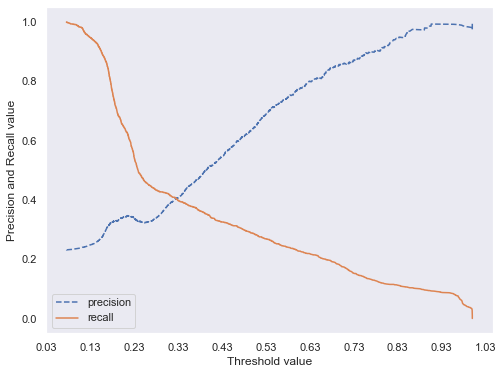

In [279]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [287]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names= y_adult_df , \
feature_names = X_adult_df.feature_names, impurity=True, filled=True)

AttributeError: 'DataFrame' object has no attribute 'feature_names'